In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [19]:
Sim_number = []
Pressures = []
Mol_frac = []
Simulation = glob.glob('Mol_Fraction_variation/O2*/*_bar/Sim_*')
for i in np.arange(len(Simulation)):
    Sim_number.append(Simulation[i][23:])
    Pressures.append(Simulation[i].rsplit('/',1)[0][23:])
    Mol_frac.append(Simulation[i].rsplit('/',1)[0].rsplit('/',1)[0][23:])
    
    
df = pd.DataFrame(np.array([Mol_frac,Pressures,Sim_number,np.ones(len(Sim_number))]).T)
df.columns = ['Mol_frac', 'Pressure', 'Sim_number','Occurence']
df["Occurence"] = pd.to_numeric(df["Occurence"])
df

,Mol_frac,Pressure,Sim_number,Occurence
0,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_25_B_0,1.0
1,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_75_B_25,1.0
2,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_0_B_25,1.0
3,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_0_B_100,1.0
4,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_50_B_50,1.0
...,...,...,...,...
265,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,O2_1.0_CO_0.0_CO2_0.0/10.0_bar/Sim_A_0_B_75,1.0
266,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,O2_1.0_CO_0.0_CO2_0.0/10.0_bar/Sim_A_75_B_0,1.0
267,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,O2_1.0_CO_0.0_CO2_0.0/10.0_bar/Sim_A_50_B_25,1.0
268,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,O2_1.0_CO_0.0_CO2_0.0/10.0_bar/Sim_A_0_B_50,1.0


In [20]:
df = df[df["Mol_frac"] == 'O2_0.5_CO_0.5_CO2_0.0'].iloc[:,1:]

In [21]:
float(str(df.iloc[:,0][1]).rsplit('/',1)[1].rsplit('_bar',1)[0])

1e-06

In [22]:
len(df.iloc[:,2])

90

In [23]:
import re
labels = df
Sim_number_label = []
Pressures_label = []
Mol_frac_label = []
for i in np.arange(len(df.iloc[:,0])):
    Pressures_label.append(float(str(df.iloc[:,0][i]).rsplit('/',1)[1].rsplit('_bar',1)[0]))
    s = Simulation[i].rsplit('/',1)[0].rsplit('/',1)[0][23:]
    p = re.compile(r'\d+\.\d+')  # Compile a pattern to capture float values
    floats = [float(i) for i in p.findall(s)]  # Convert strings to float
    Mol_frac_label.append(str(floats))
    
    s = Simulation[i][23:].rsplit('/',1)[1]
    p = re.compile(r'\d+')  # Compile a pattern to capture float values
    floats = [int(float(i)) for i in p.findall(s)]  # Convert strings to float
    Sim_number_label.append(str(floats))
    
# labels=labels.assign(Pressure=Mol_frac_label)
labels=labels.assign(Pressure=Pressures_label)
labels=labels.assign(Sim_number=Sim_number_label)
labels

,Pressure,Sim_number,Occurence
0,0.000001,"[25, 0]",1.0
1,0.000001,"[75, 25]",1.0
2,0.000001,"[0, 25]",1.0
3,0.000001,"[0, 100]",1.0
4,0.000001,"[50, 50]",1.0
...,...,...,...
85,10.000000,"[0, 75]",1.0
86,10.000000,"[75, 0]",1.0
87,10.000000,"[50, 25]",1.0
88,10.000000,"[0, 50]",1.0


In [24]:
inner = df.groupby(['Pressure']).sum()
outer = df.groupby(['Sim_number','Pressure']).sum()

unique_outer_strings = set()    
for s in list(labels.iloc[:,0]):
# Assuming the strings are comma-separated values, you may modify this based on your actual input format
    unique_outer_strings.add(s)
unique_outer_strings = list(unique_outer_strings)
inner_label = unique_outer_strings


unique_inner_strings = set()    
for s in list(labels.iloc[:,1]):
# Assuming the strings are comma-separated values, you may modify this based on your actual input format
    unique_inner_strings.add(s)
unique_inner_strings = list(unique_inner_strings)
outer_label = unique_inner_strings

outer_label

['[25, 25]',
 '[75, 0]',
 '[25, 0]',
 '[0, 50]',
 '[100, 0]',
 '[25, 50]',
 '[25, 75]',
 '[0, 75]',
 '[50, 0]',
 '[0, 25]',
 '[50, 50]',
 '[0, 100]',
 '[75, 25]',
 '[0, 0]',
 '[50, 25]']

In [25]:
len(outer.values[:,0])

90

In [26]:
inner.index

Index(['O2_0.5_CO_0.5_CO2_0.0/0.001_bar', 'O2_0.5_CO_0.5_CO2_0.0/0.1_bar',
       'O2_0.5_CO_0.5_CO2_0.0/1.0_bar', 'O2_0.5_CO_0.5_CO2_0.0/10.0_bar',
       'O2_0.5_CO_0.5_CO2_0.0/1e-06_bar', 'O2_0.5_CO_0.5_CO2_0.0/20.0_bar'],
      dtype='object', name='Pressure')

In [27]:
outer.values.sum().flatten()

array([90.])

In [28]:
len(outer.values.flatten())

90

In [29]:
len(inner.values.flatten())

12

In [30]:
len(outer_label*len(inner.values[:,1].astype(float).flatten()))

90

In [31]:
# plt.cm.Greens(np.linspace(0.2, 1, len(inner.index)))
len(inner.values[:,1].flatten())

6

<IPython.core.display.Javascript object>


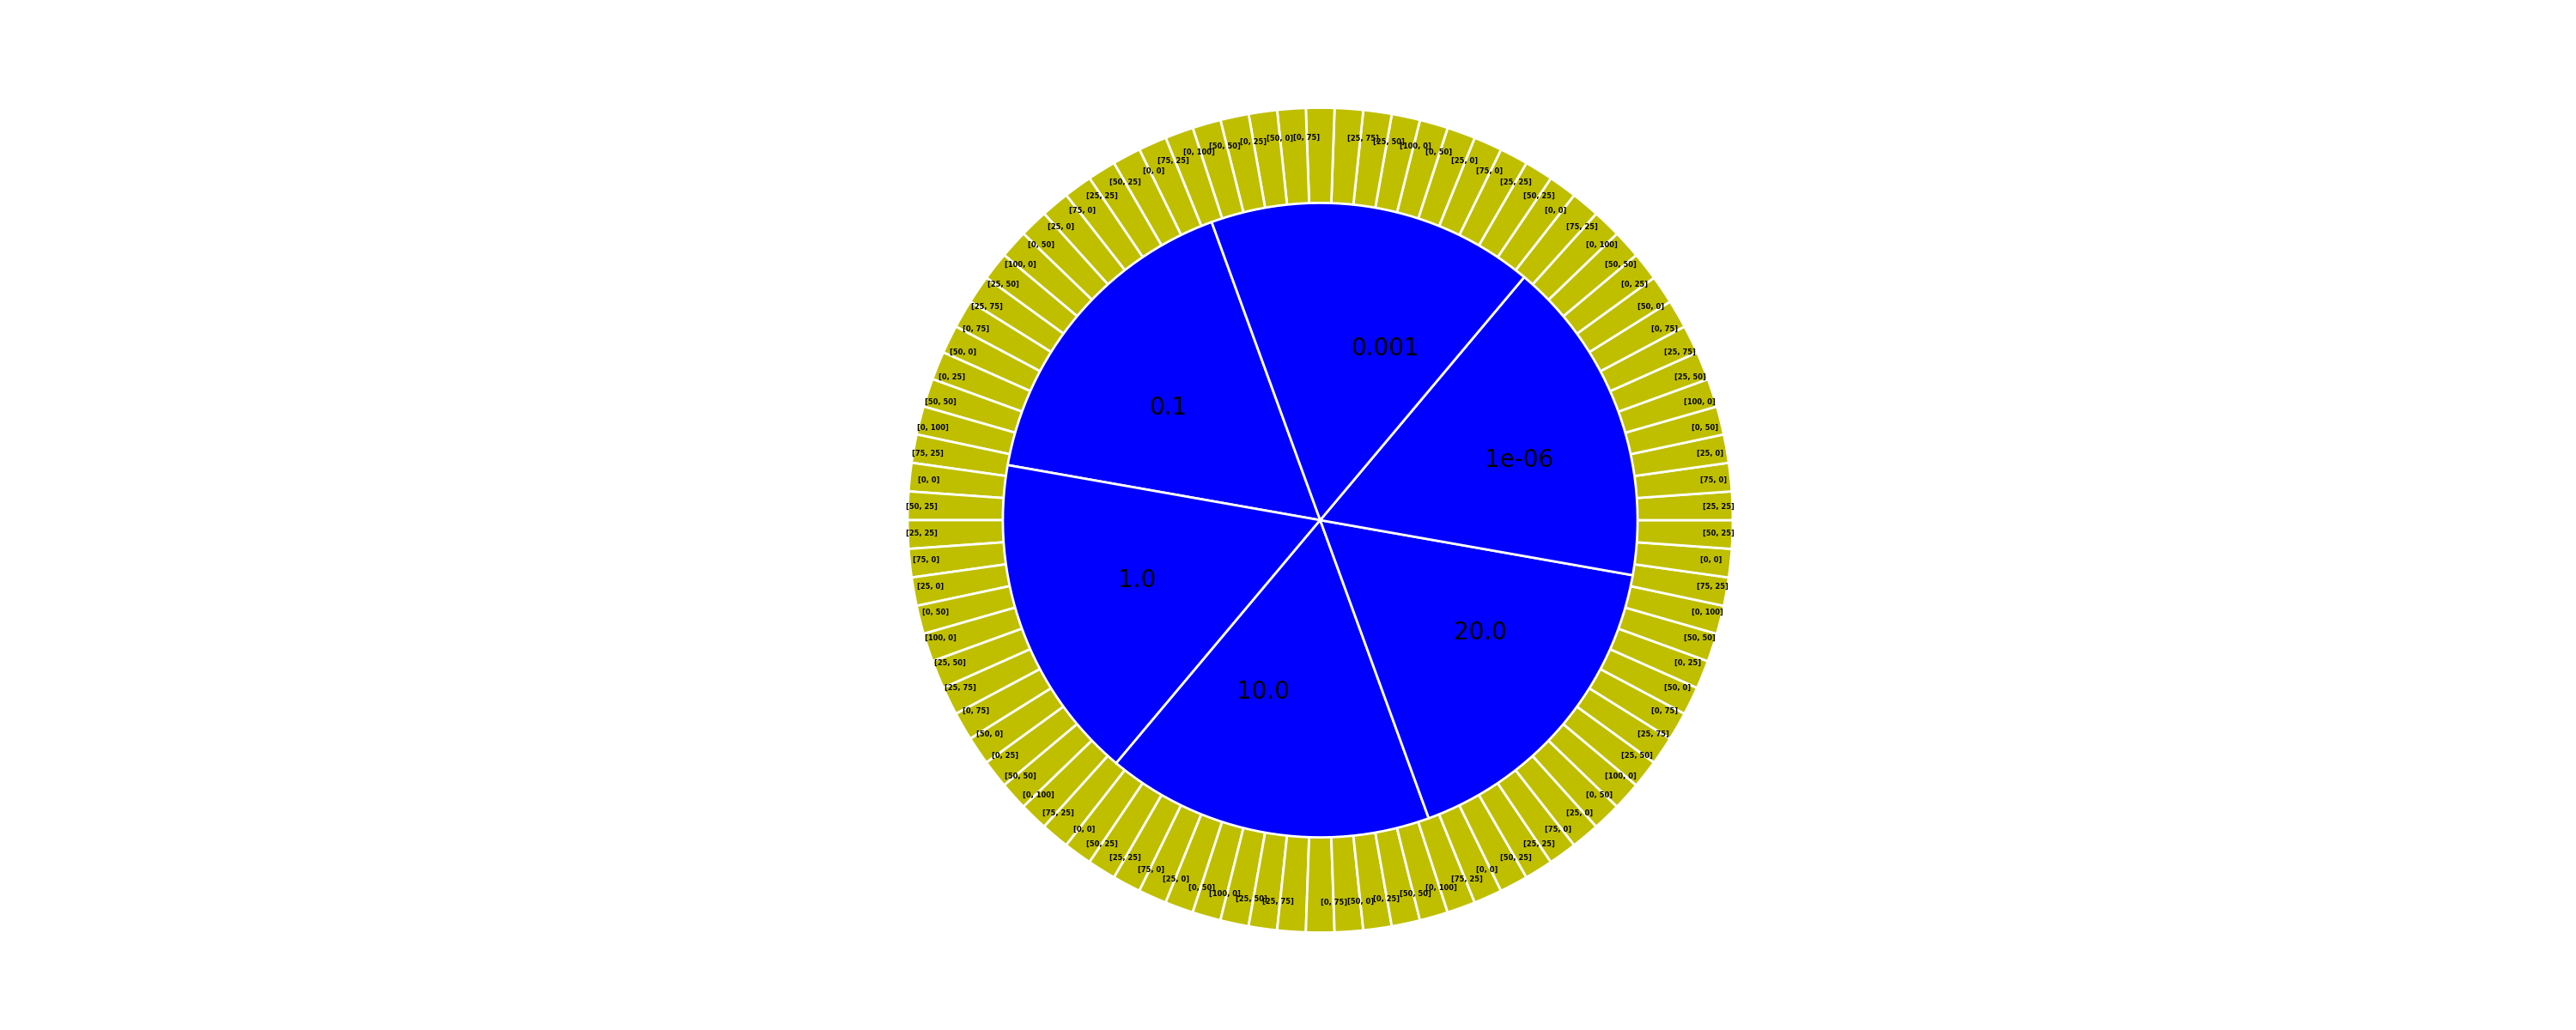

In [57]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

import numpy as np

fig, ax = plt.subplots(figsize=(15,6))
size = 0.3

shades_of_green = 'y'
shades_of_blue = 'b'# plt.cm.Blues(np.linspace(0.2, 1, len(inner.index)))

outer_label_ = outer_label*len(inner.values[:,1].astype(float).flatten())
w,p = ax.pie(outer.values[:,0].flatten(), labels = outer_label_, labeldistance=1+0.03,colors=shades_of_green, 
             radius=1+(size), wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
             textprops={'fontsize': 3, 'color':'black', 'weight':'bold'},
               frame=False, startangle=240, pctdistance=1)

# set required distance per segment from chart center
pctdists = [1-(size)+0.2]*len(outer.values.flatten())

for t, d in zip(p, pctdists):
    xi, yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))
    
# w, l, p = ax.pie(inner.values[:,1].astype(float).flatten(), radius=1,
# #        labels=inner.index,
#        colors=shades_of_blue,
#        wedgeprops=dict(width=size, edgecolor='w'))

# w,l,p = ax.pie(inner.values[:,1].flatten(), radius=1, colors=shades_of_blue,)

w,p = ax.pie(inner.values[:,1].flatten(), labels = inner_label, colors=shades_of_blue, radius=1, wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
               frame=False, startangle=110, pctdistance=1)

# set required distance per segment from chart center
pctdists = [.5]*len(inner.values[:,1].flatten())

for t, d in zip(p, pctdists):
    xi, yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))


# # set required distance per segment from chart center
# pctdists = [.92, .3, .3, .3]

# for t, d in zip(p, pctdists):
#     xi, yi = t.get_position()
#     ri = np.sqrt(xi**2+yi**2)
#     phi = np.arctan2(yi,xi)
#     x = d*ri*np.cos(phi)
#     y = d*ri*np.sin(phi)
#     t.set_position((x,y))


# ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [ ]:
inner.values[:,1].flatten()

In [ ]:
outer = df.groupby(['Pressure']).sum()
inner = df.groupby(['Sim_number','Pressu\re']).sum()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

import numpy as np

fig, ax = plt.subplots(figsize=(15,6))
size = 0.3

shades_of_green = plt.cm.Greens(np.linspace(0.2, 1, len(inner.index)))
shades_of_blue = plt.cm.Blues(np.linspace(0.2, 1, len(inner.index)))


ax.pie(outer.values[:,1].flatten(), radius=1+(size), 
#        labels = inner.index,
       colors=shades_of_green,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values[:,0].astype(float).flatten(), radius=1,
#        labels=inner.index,
       colors=shades_of_blue,
       wedgeprops=dict(width=size, edgecolor='w'))

# ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# set chart style
# plt.style.use('_mpl-gallery-nogrid')

# set data
x = [0.1, 2, 3, 4]

# set colors of segments
colors = plt.get_cmap('GnBu')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
w,l,p = ax.pie(x, colors=colors, radius=3, wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
               frame=False, startangle=0, autopct='%.1f%%', pctdistance=1)

# set required distance per segment from chart center
pctdists = [.92, .3, .3, .3]

for t, d in zip(p, pctdists):
    xi, yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))

plt.show()